In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#original source: https://www.kaggle.com/blastchar/telco-customer-churn

filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
def getDataset(filename):
    import os
    if filename not in os.listdir():
        !pip3 install wget
        import wget
        url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
        downloaded_filename = wget.download(url)
        print(f'{downloaded_filename} file downloaded')
    else:
        print(f'{filename} already exists')
        
getDataset(filename)

WA_Fn-UseC_-Telco-Customer-Churn.csv already exists


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
churn_df = df['Churn']
df.drop(['customerID', 'Churn'], axis=1, inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

### Gender

In [7]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [8]:
gender_map = {"Male":0, "Female":1}

In [9]:
df['gender'] = df['gender'].replace(gender_map).astype(bool)

In [10]:
df['gender']

0        True
1       False
2       False
3       False
4        True
        ...  
7038    False
7039     True
7040     True
7041    False
7042    False
Name: gender, Length: 7043, dtype: bool

### SeniorCitizen

In [11]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df['SeniorCitizen'].astype(bool)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: SeniorCitizen, Length: 7043, dtype: bool

### Partner

In [13]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [14]:
yesno_map = {"Yes":1, "No":0}

In [15]:
df['Partner'] = df['Partner'].replace(yesno_map).astype(bool)

### Dependents

In [16]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [17]:
df['Dependents'] = df['Dependents'].replace(yesno_map).astype(bool)

### Tenure

In [18]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

### PhoneService

In [19]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [20]:
df['PhoneService'] = df['PhoneService'].replace(yesno_map).astype(bool)

### MultipleLines

In [21]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [22]:
multiple_lines_map = {"Yes":1, "No":0, "No phone service":0}

In [23]:
df['MultipleLines'] = df['MultipleLines'].replace(multiple_lines_map).astype(bool)

### InternetService

In [24]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [25]:
internet_dummies = pd.get_dummies(df['InternetService'])
internet_dummies

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [26]:
df = pd.merge(df, internet_dummies.iloc[:, 0:2], left_on=df.index, right_on = internet_dummies.index)

In [27]:
df.drop(['InternetService', 'key_0'], axis=1, inplace=True)

### OnlineSecurity

In [28]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [29]:
online_security_map = {"Yes":1, "No":0, "No internet service":0}

In [30]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace(online_security_map).astype(bool)

Task 1. Finish other columns

In [31]:
mini_df = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 
              'OnlineSecurity', 'MonthlyCharges', 'DSL', 'Fiber optic']]

In [32]:
mini_df.dtypes

gender               bool
SeniorCitizen       int64
Partner              bool
Dependents           bool
tenure              int64
PhoneService         bool
MultipleLines        bool
OnlineSecurity       bool
MonthlyCharges    float64
DSL                 uint8
Fiber optic         uint8
dtype: object

### PCA

Task 2. Build PCA

In [33]:
n_comp = mini_df.shape[1]
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(mini_df)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.6567733902328328
0.34221704839325134
0.0002415389913714201
0.00019707868968773783
0.00016555496875530953
0.00011193132345077556
9.704121282066782e-05
8.074472233515958e-05
6.479592638378379e-05
4.431721306948782e-05
6.5583260418301155e-06


Task 3. Analysis PC-feature dependences

In [34]:
pd.DataFrame(pca.components_.T, columns=[f'PC{x}' for x in range(n_comp)], index=mini_df.columns)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
gender,0.000173,-0.000291,0.006338,-0.006614,0.999454,-0.010422,0.002299,-0.028121,0.009792,0.000246,0.002509
SeniorCitizen,0.002292,-0.001753,-0.111307,-0.092606,-0.000872,0.082584,0.724903,0.204657,0.613582,-0.167013,-0.021465
Partner,0.003332,0.006958,0.090411,0.714774,0.011658,0.033688,0.477596,0.124261,-0.485843,-0.000153,0.003469
Dependents,-0.000659,0.004443,0.146527,0.666138,-0.007357,-0.061916,-0.350060,-0.175865,0.613861,0.021178,0.011730
tenure,0.426296,0.904509,-0.005048,-0.007768,-0.000007,-0.005255,-0.000684,-0.003652,0.001556,-0.000583,0.002223
PhoneService,0.002035,-0.001709,-0.207802,0.078022,0.006769,0.093445,-0.196711,0.113522,-0.079361,-0.899851,0.272643
MultipleLines,0.008379,0.001034,-0.212634,0.063553,0.013165,0.944799,-0.117806,0.057227,0.018892,0.196611,0.041132
OnlineSecurity,0.005243,0.003033,0.451666,-0.031735,0.021182,0.011345,-0.210520,0.862221,0.052520,0.053892,0.031155
MonthlyCharges,0.904451,-0.426249,0.008682,0.000181,-0.000562,-0.003941,-0.000359,-0.007907,-0.000758,-0.003617,-0.010617
DSL,-0.002023,0.002163,0.708256,-0.150238,-0.014955,0.204641,0.164200,-0.352950,-0.000465,-0.076574,0.525635


Task 4. Draw scatter plot to visualize PC - churn_df relations

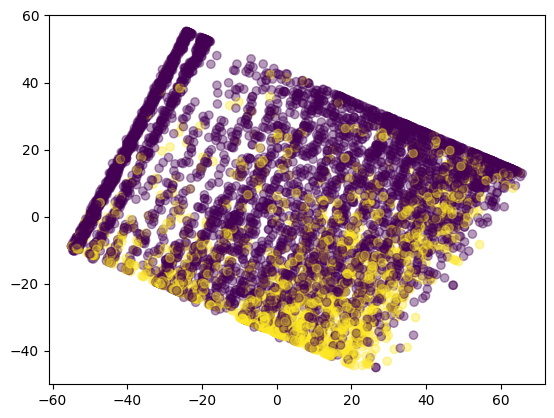

In [35]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=churn_df.replace(yesno_map), alpha=0.4)
plt.show()

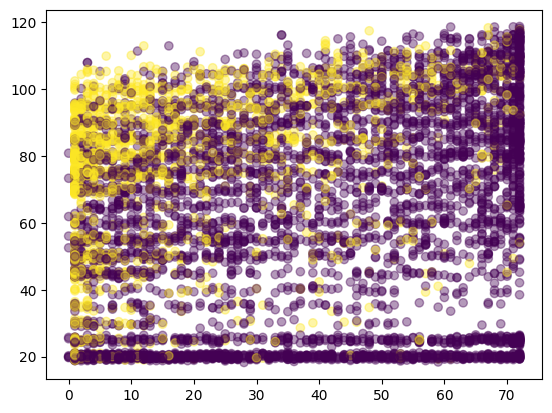

In [36]:
plt.scatter(mini_df['tenure'], mini_df['MonthlyCharges'], c=churn_df.replace(yesno_map), alpha=0.4)
plt.show()